Sridhar Kumar

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [171]:
data = pd.read_csv('data/coupons.csv')

In [172]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [173]:
data_null_values = data.isnull().sum()
# data_null_values = data.isnull().sum().sum() --> total null values 13,370
data_null_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [174]:
data2 = data.fillna(value = 0)  # I have chosen to replace the missing data with '0'
#data2
null_check = data2.isnull().sum()
null_check

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [175]:
accepted_coupon = data2['Y'].value_counts() # 7210 people accepted the coupons
accepted_coupon

Y
1    7210
0    5474
Name: count, dtype: int64

**7210 people accepted the coupons**

5. Use a bar plot to visualize the `coupon` column.

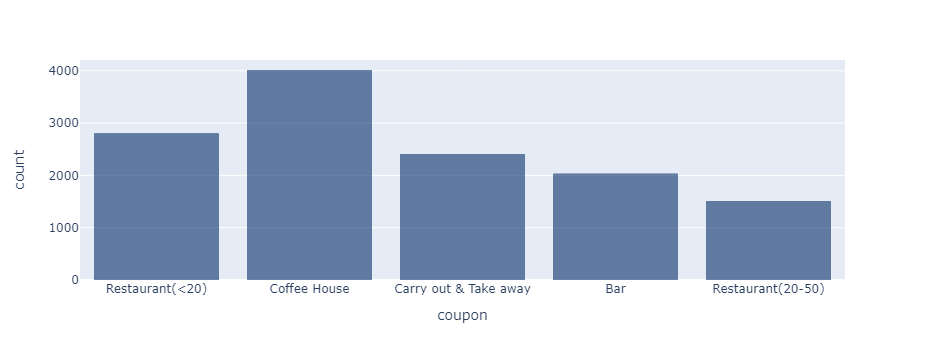

In [176]:
fig = px.bar(data2, x='coupon')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

6. Use a histogram to visualize the temperature column.

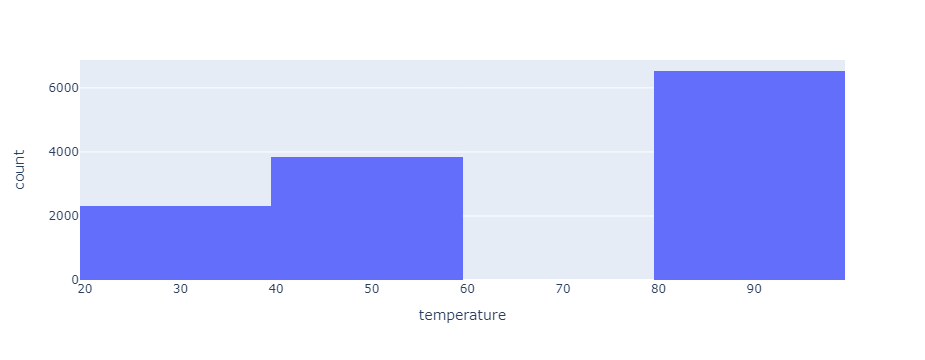

In [177]:
fig = px.histogram(data2, x="temperature")
fig.show()

In [178]:
credit_class = data2['coupon'].value_counts()
credit_class

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [179]:
old = data2[data2['coupon'] == 'Bar']
new = old.filter(['coupon', 'Y'])
new

,coupon,Y
9,Bar,0
13,Bar,1
17,Bar,0
24,Bar,1
35,Bar,1
...,...,...
12663,Bar,0
12664,Bar,0
12667,Bar,0
12670,Bar,0


2. What proportion of bar coupons were accepted?


In [180]:
bar_accepted_coupon = new['Y'].value_counts()
bar_accepted_coupon # so only 827 people accepted the coupon

Y
0    1190
1     827
Name: count, dtype: int64

**only 827 people of the "bar coupon" portion accepted the coupon**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [181]:
bar_values = data2['Bar'].value_counts()  # 3 or fewer meaning less than 3 times a month
bar_values

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
0         107
Name: count, dtype: int64

In [182]:
filter1 = (data2['Bar'] == 'never')
filter2 = (data2['Bar'] == 'less1')
filter3 = (data2['Bar'] == '1~3')

drink_never = data2.loc[filter1, 'Y']
drink_never_ = drink_never.value_counts()
print(drink_never_) # 2767 accepted

drink_less1 = data2.loc[filter2, 'Y']
drink_less1_ = drink_less1.value_counts()
print(drink_less1_) # 1963 accepted

drink_1to3 = data2.loc[filter3, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 1538 accepted

Y
1    2767
0    2430
Name: count, dtype: int64
Y
1    1963
0    1519
Name: count, dtype: int64
Y
1    1538
0     935
Name: count, dtype: int64


**The acceptance rate of those who went to a bar 3 or fewer times a month is approximately: 56.2%**

In [183]:
filter1 = (data2['Bar'] == '4~8')
filter2 = (data2['Bar'] == 'gt8')

drink_4to8 = data2.loc[filter1, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 686 accepted

drink_gt8 = data2.loc[filter2, 'Y']
drink_gt8 = drink_gt8.value_counts()
print(drink_gt8) # 201 accepted

Y
1    686
0    390
Name: count, dtype: int64
Y
1    201
0    148
Name: count, dtype: int64


**The acceptance rate of those who went to a bar more than 3 times a month is approximately: 62.2%**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [184]:
new2 = data2.query("age > '25'") 
new2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [185]:
filter1 = (new2['Bar'] == '1~3')
filter2 = (new2['Bar'] == '4~8')
filter3 = (new2['Bar'] == 'gt8')

drink_1to3 = new2.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 1130 accepted

drink_4to8 = new2.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 504 accepted

drink_gt8 = new2.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 132 accepted

Y
1    1130
0     683
Name: count, dtype: int64
Y
1    504
0    286
Name: count, dtype: int64
Y
1    132
0    107
Name: count, dtype: int64


**Drivers who go to a bar more than once a month and are over the age of 25 have a 62.1% acceptance rate.** No change from the drivers acceptance rate of those who went to a bar more than 3 times a month.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [186]:
df = data2.drop(index = data2[data2['occupation'] == 'Farming Fishing & Forestry'].index) #dropping specific occupations
df2 = df.drop(index = df[df['passanger'] == 'Kid(s)'].index) #dropping passengers who are kids
df2 

filter1 = (df2['Bar'] == '1~3')
filter2 = (df2['Bar'] == '4~8')
filter3 = (df2['Bar'] == 'gt8')

drink_1to3 = df2.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 1441 accepted

drink_4to8 = df2.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 666 accepted

drink_gt8 = df2.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 196 accepted

Y
1    1441
0     870
Name: count, dtype: int64
Y
1    666
0    376
Name: count, dtype: int64
Y
1    196
0    147
Name: count, dtype: int64


**The acceptance rate is around 62.3%**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [187]:
new3 = data2.query("age < '30'") # ages less than 30

filter1 = (new3['Bar'] == '1~3')
filter2 = (new3['Bar'] == '4~8')
filter3 = (new3['Bar'] == 'gt8')

drink_1to3 = new3.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 777 accepted

drink_4to8 = new3.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 472 accepted

drink_gt8 = new3.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 138 accepted

Y
1    777
0    488
Name: count, dtype: int64
Y
1    472
0    230
Name: count, dtype: int64
Y
1    138
0    102
Name: count, dtype: int64


**The acceptance rate for people who go to bars more than once a month and are under the age of 30 is 62.9% or 63% rounded up**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers who accepted the bar coupons the most were people who already frequented the bars many times a month. This was evident by questions 4, 5, and 6 where the common denominator was that the people went to the bars more than once a month. To add, in question 3, it was apparent that people who went to the bar less than 3 times a month only accepted the coupon 56.2% of the time as opposed to the 62.2% acceptance rate of those who went to a bar more than 3 times a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating the coffee house coupon (coupon exclusively being for coffee house)

In [188]:
# New `DataFrame` that contains just the coffee house coupons

old_coffee = data2[data2['coupon'] == 'Coffee House']
coffee = old_coffee.filter(['coupon','CoffeeHouse', 'Y'])
coffee

,coupon,CoffeeHouse,Y
1,Coffee House,never,0
3,Coffee House,never,0
4,Coffee House,never,0
12,Coffee House,never,1
15,Coffee House,never,0
...,...,...,...
12656,Coffee House,never,0
12659,Coffee House,never,0
12674,Coffee House,never,0
12675,Coffee House,never,0


In [189]:
CH_accepted_coupon = coffee['Y'].value_counts()
CH_accepted_coupon # 1995 people accepted the coupon ~50%

Y
0    2001
1    1995
Name: count, dtype: int64

In [190]:
# Comparing the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.
filter1 = (coffee['CoffeeHouse'] == 'never')
filter2 = (coffee['CoffeeHouse'] == 'less1')
filter3 = (coffee['CoffeeHouse'] == '1~3')

never = coffee.loc[filter1, 'Y']
never_ = never.value_counts()
print(never_) # 175 accepted

less1 = coffee.loc[filter2, 'Y']
less1_ = less1.value_counts()
print(less1_) # 518 accepted

_1to3 = coffee.loc[filter3, 'Y']
_1to3_ = _1to3.value_counts()
print(_1to3_) # 675 accepted


Y
0    752
1    175
Name: count, dtype: int64
Y
0    557
1    518
Name: count, dtype: int64
Y
1    675
0    367
Name: count, dtype: int64


**The acceptance rate of those who went to a coffee house 3 or fewer times a month is approximately: 45%**

In [191]:
filter1 = (coffee['CoffeeHouse'] == '4~8')
filter2 = (coffee['CoffeeHouse'] == 'gt8')

drink_4to8 = coffee.loc[filter1, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 369 accepted

drink_gt8 = coffee.loc[filter2, 'Y']
drink_gt8 = drink_gt8.value_counts()
print(drink_gt8) # 225 accepted

Y
1    369
0    169
Name: count, dtype: int64
Y
1    225
0    117
Name: count, dtype: int64


**The acceptance rate of those who went to a coffee house more than 3 times a month is approximately: 68%**

In [192]:
old = data2.query("age > '30'") 
old_coffee = old[old['coupon'] == 'Coffee House']
coffee = old_coffee.filter(['coupon','CoffeeHouse', 'Y'])
coffee

,coupon,CoffeeHouse,Y
45,Coffee House,4~8,1
48,Coffee House,4~8,1
49,Coffee House,4~8,1
50,Coffee House,4~8,0
52,Coffee House,4~8,0
...,...,...,...
12602,Coffee House,less1,0
12608,Coffee House,less1,1
12655,Coffee House,never,0
12656,Coffee House,never,0


In [193]:
filter1 = (coffee['CoffeeHouse'] == '1~3')
filter2 = (coffee['CoffeeHouse'] == '4~8')
filter3 = (coffee['CoffeeHouse'] == 'gt8')

drink_1to3 = coffee.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 336 accepted

drink_4to8 = coffee.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 223 accepted

drink_gt8 = coffee.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 121 accepted

Y
1    336
0    214
Name: count, dtype: int64
Y
1    223
0    106
Name: count, dtype: int64
Y
1    121
0     55
Name: count, dtype: int64


**Drivers who go to a coffee house more than once a month and are over the age of 30 have a 64.5% acceptance rate.**

In [194]:
old = data2.query("age < '30'") 
old_coffee = old[old['coupon'] == 'Coffee House']
coffee = old_coffee.filter(['coupon','CoffeeHouse', 'Y'])
coffee

,coupon,CoffeeHouse,Y
1,Coffee House,never,0
3,Coffee House,never,0
4,Coffee House,never,0
12,Coffee House,never,1
15,Coffee House,never,0
...,...,...,...
12625,Coffee House,4~8,0
12631,Coffee House,4~8,1
12674,Coffee House,never,0
12675,Coffee House,never,0


In [195]:
filter1 = (coffee['CoffeeHouse'] == '1~3')
filter2 = (coffee['CoffeeHouse'] == '4~8')
filter3 = (coffee['CoffeeHouse'] == 'gt8')

drink_1to3 = coffee.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 339 accepted

drink_4to8 = coffee.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 146 accepted

drink_gt8 = coffee.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 104 accepted

Y
1    339
0    153
Name: count, dtype: int64
Y
1    146
0     63
Name: count, dtype: int64
Y
1    104
0     62
Name: count, dtype: int64


**Drivers who go to a coffee house more than once a month and are under the age of 30 have about a 68% acceptance rate.**

In [196]:
coupon = data2[data2['coupon'] == 'Coffee House']
occupation = coupon[coupon['occupation'] == 'Student']
occupation_ = occupation.filter(['coupon','occupation', 'Y'])
occupation_.value_counts()
# 312

coupon        occupation  Y
Coffee House  Student     1    312
                          0    187
Name: count, dtype: int64

In [197]:
coupon = data2[data2['coupon'] == 'Coffee House']
occupation = coupon[coupon['occupation'] == 'Unemployed']
occupation_ = occupation.filter(['coupon','occupation', 'Y'])
occupation_.value_counts()
#309

coupon        occupation  Y
Coffee House  Unemployed  1    309
                          0    261
Name: count, dtype: int64

In [198]:
coupon = data2[data2['coupon'] == 'Coffee House']
occupation = coupon[coupon['occupation'] == 'Computer & Mathematical']
occupation_ = occupation.filter(['coupon','occupation', 'Y'])
occupation_.value_counts()
#226

coupon        occupation               Y
Coffee House  Computer & Mathematical  1    226
                                       0    223
Name: count, dtype: int64

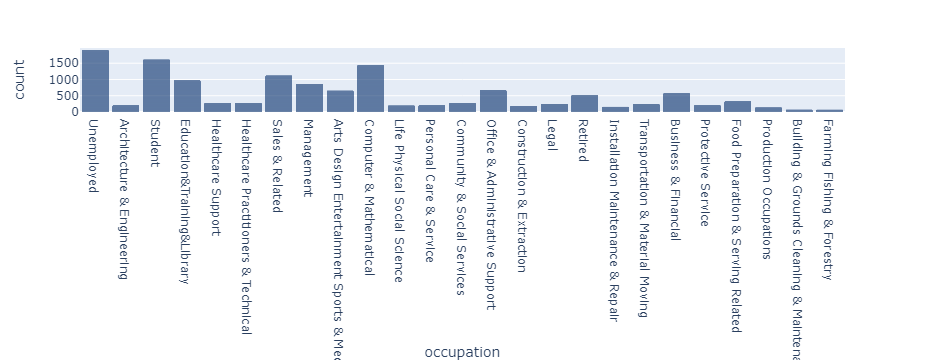

In [199]:
fig = px.bar(data2, x='occupation')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

The graph above shows that the top 3 occupations consist of "Unemployed", "Student", and "Computer & Mathematical". Students have an acceptance rate of **62.5%**. Unemployed people have an acceptance rate of **54.2%**. Finally, people under occpuation "Computer & Mathematical" have an acceptance rate of about **50%**.

### FINDINGS

The acceptance rate increases for people who visit a coffee house more often. It is also evident that people under the age of 30 have an increased acceptance rate compared to people over 30. Also, out of the top 3 occupations, students have the highest acceptance rate of 62.5%. Therefore, students under the age of 30, who also frequent coffee shops, are more prone to using provided coupons. 

<Axes: xlabel='Y', ylabel='count'>

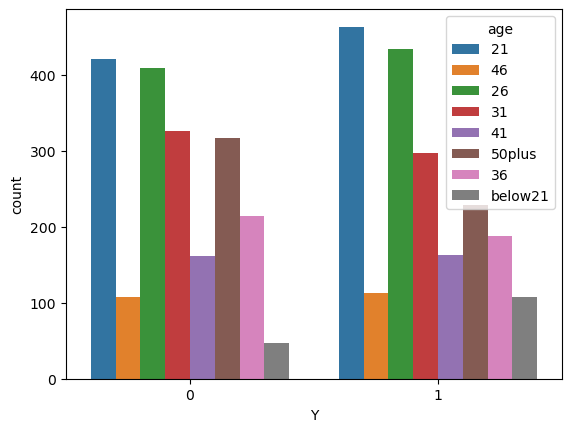

In [200]:
coffee_11 = data2[data2['coupon'] == 'Coffee House']
sns.countplot(data = coffee_11, x = 'Y', hue = 'age')

This graph above proves the idea that students under the age of 30 are more likely to use the coupons.

<Axes: xlabel='Y', ylabel='count'>

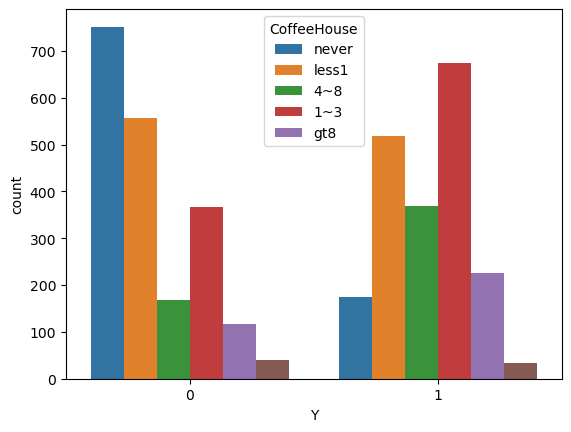

In [201]:
sns.countplot(data = coffee_11, x = 'Y', hue = 'CoffeeHouse')

This graph above proves the idea that people who visit coffee shops 1~3 times a month are more likely to use the coupons.

### Bar coupon Batch 2:

### Investigating people who were exclusively offered the Bar coupons.

In [202]:
old = data2[data2['coupon'] == 'Bar']
new = old.filter(['coupon', 'Bar', 'Y'])
new

,coupon,Bar,Y
9,Bar,never,0
13,Bar,never,1
17,Bar,never,0
24,Bar,never,1
35,Bar,never,1
...,...,...,...
12663,Bar,never,0
12664,Bar,never,0
12667,Bar,never,0
12670,Bar,never,0


In [203]:
filter1 = (new['Bar'] == 'never')
filter2 = (new['Bar'] == 'less1')
filter3 = (new['Bar'] == '1~3')

drink_never = new.loc[filter1, 'Y']
drink_never_ = drink_never.value_counts()
print(drink_never_) # 156 accepted

drink_less1 = new.loc[filter2, 'Y']
drink_less1_ = drink_less1.value_counts()
print(drink_less1_) # 253 accepted

drink_1to3 = new.loc[filter3, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 257 accepted

Y
0    674
1    156
Name: count, dtype: int64
Y
0    317
1    253
Name: count, dtype: int64
Y
1    257
0    140
Name: count, dtype: int64


**The acceptance rate of those who went to a bar 3 or fewer times a month is approximately: 37%**

In [204]:
filter1 = (new['Bar'] == '4~8')
filter2 = (new['Bar'] == 'gt8')

drink_4to8 = new.loc[filter1, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 686 accepted

drink_gt8 = new.loc[filter2, 'Y']
drink_gt8 = drink_gt8.value_counts()
print(drink_gt8) # 201 accepted

Y
1    117
0     33
Name: count, dtype: int64
Y
1    36
0    13
Name: count, dtype: int64


**The acceptance rate of those who went to a bar more than 3 times a month is approximately: 77%**

In [205]:
old = data2.query("age > '25'") 
new = old[old['coupon'] == 'Bar']
new2 = new.filter(['coupon', 'Bar', 'Y'])
new2

,coupon,Bar,Y
46,Bar,never,0
57,Bar,never,0
61,Bar,never,0
75,Bar,less1,1
79,Bar,less1,1
...,...,...,...
12663,Bar,never,0
12664,Bar,never,0
12667,Bar,never,0
12670,Bar,never,0


In [206]:
filter1 = (new2['Bar'] == '1~3')
filter2 = (new2['Bar'] == '4~8')
filter3 = (new2['Bar'] == 'gt8')

drink_1to3 = new2.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 189 accepted

drink_4to8 = new2.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 84 accepted

drink_gt8 = new2.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 23 accepted

Y
1    189
0    101
Name: count, dtype: int64
Y
1    84
0    22
Name: count, dtype: int64
Y
1    23
0    11
Name: count, dtype: int64


**Drivers who go to a bar more than once a month and are over the age of 25 have a 68.8% acceptance rate.** This is a decrease from the drivers acceptance rate of those who went to a bar more than 3 times a month.

In [207]:
old = data2[data2['coupon'] == 'Bar']

df = old.drop(index = old[old['occupation'] == 'Farming Fishing & Forestry'].index) #dropping specific occupations
df2 = df.drop(index = df[df['passanger'] == 'Kid(s)'].index) #dropping passengers who are kids
df2 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [208]:
filter1 = (df2['Bar'] == '1~3')
filter2 = (df2['Bar'] == '4~8')
filter3 = (df2['Bar'] == 'gt8')

drink_1to3 = df2.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 245 accepted

drink_4to8 = df2.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 113 accepted

drink_gt8 = df2.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 35 accepted

Y
1    245
0    115
Name: count, dtype: int64
Y
1    113
0     30
Name: count, dtype: int64
Y
1    35
0    13
Name: count, dtype: int64


**Acceptance rate is about 71% for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**

In [209]:
old = data2[data2['coupon'] == 'Bar']
new3 = old.query("age < '30'") # ages less than 30

filter1 = (new3['Bar'] == '1~3')
filter2 = (new3['Bar'] == '4~8')
filter3 = (new3['Bar'] == 'gt8')

drink_1to3 = new3.loc[filter1, 'Y']
drink_1to3_ = drink_1to3.value_counts()
print(drink_1to3_) # 137 accepted

drink_4to8 = new3.loc[filter2, 'Y']
drink_4to8_ = drink_4to8.value_counts()
print(drink_4to8_) # 80 accepted

drink_gt8 = new3.loc[filter3, 'Y']
drink_gt8_ = drink_gt8.value_counts()
print(drink_gt8_) # 28 accepted

Y
1    137
0     66
Name: count, dtype: int64
Y
1    80
0    19
Name: count, dtype: int64
Y
1    28
0     5
Name: count, dtype: int64


**The acceptance rate for people who go to bars more than once a month and are under the age of 30 is around 73%**

<Axes: xlabel='Y', ylabel='count'>

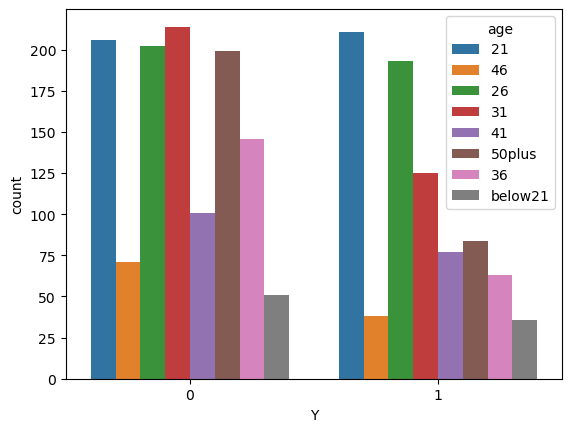

In [210]:
old_11 = data2[data2['coupon'] == 'Bar']
sns.countplot(data = old_11, x = 'Y', hue = 'age')

The graph above proves the idea that people under the age of 40 also more likely to accept the coupon. The highest accepting group being age 21. 